## 1. 아이리스 분류하기

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

print(type(dir(iris))) 
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

<class 'list'>


### <B> 1-1. 아이리스 데이터 내부 구조 파악

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris_data = iris.data

print(iris_data.shape) 
#shape는 배열의 형상정보를 출력

(150, 4)


In [4]:
iris_data[0]
# 예시로 하나만 출력

array([5.1, 3.5, 1.4, 0.2])

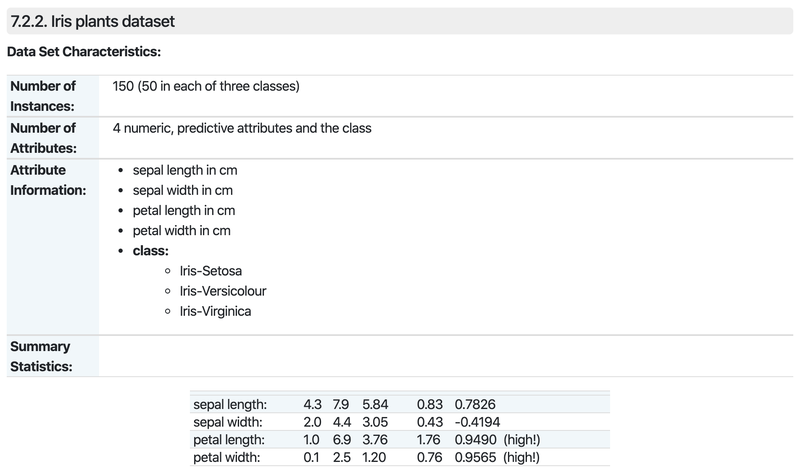순서대로 sepal length, sepal width, petal length, petal width 를 나타냄

In [5]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

150개의 배열값으로 추측해보면 어떤 꽃인지 추측가능

In [7]:
iris.filename
# 아이리스 데이터셋의 저장경로

'/home/ssac24/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv'

### 1-2. panda를 이용한 머신러닝

In [8]:
import pandas as pd

print(pd.__version__)

1.1.5


In [10]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


문제지 : 머신러닝 모델에게 입력되는 데이터. feature라고 부르기도 한다. 변수 이름으로는 X를 많이 사용한다. 앞의 4가지 cm 데이터를 말함   
정답지 : 머신러닝 모델이 맞추어야 하는 데이터. label, 또는 target이라고 부르기도 한다. 변수 이름으로는 y를 많이 사용한다.

### 1-3. 데이터셋 분리

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))
# 3번째 인자는 전체 데이터의 양에서 몇 퍼센트를 테스트셋으로 나눌지 구분하는 인자
# random_state는 random_seed로 대체가능

X_train 개수:  120 , X_test 개수:  30


### 1-4. 의사결정트리 사용해보기

In [15]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [18]:
decision_tree.fit(X_train, y_train)
# fit = 학습시킨다

DecisionTreeClassifier(random_state=32)

### 1-5. 테스트

In [20]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [21]:
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy
# 정확도를 측정할수 있는 매트릭스

0.9

### 요약

In [24]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



### 1-6 랜덤포레스트

In [26]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### 내장 분류 모델들
1. SVM(서포트 벡터 머신) https://excelsior-cjh.tistory.com/66?category=918734


In [28]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



2. Stochastic Gradient Descent Classifier (SGDClassifier) - 확률적 경사하강법
https://scikit-learn.org/stable/modules/sgd.html 

In [30]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.85      0.85      0.85        13
           2       0.78      0.88      0.82         8

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



3. Logistic Regression - 로지스틱 회귀  http://hleecaster.com/ml-logistic-regression-concept/

In [33]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=200)
# 로지스틱의 max_iter값은 기본으로 100으로 되어있으므로 그 수를 늘려 메모리에 저장되는 벡터수를 늘려주면 된다.

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 2. 정확도 측정에 대해 알아보자

In [35]:
from sklearn.datasets import load_digits

digits = load_digits()
# 손글씨 데이터 가져오기
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [36]:
# 데이터 개수
digits_data = digits.data
# 데이터 유형
digits_data.shape


(1797, 64)

In [37]:
digits_data[0]
# 데이터가 8X8픽셀로 이루어진 배열임을 알 수 있다.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

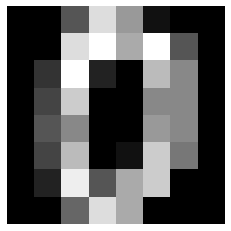

In [38]:
import matplotlib.pyplot as plt
# 이미지를 보기 위한 라이브러리
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

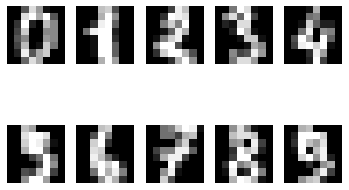

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
# 여러개 보기
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

# target 데이터 구성
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

In [41]:
# 3일때만 표기
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

### 2-1. 손글씨 데이터 의사결정트리로 정확도 측정

In [43]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


digits = load_digits()
digits_data = digits.data
digits_label = digits.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label, 
                                                    test_size=0.2, 
                                                    random_state=20)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=20)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       322
           3       0.92      0.92      0.92        38

    accuracy                           0.98       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.98      0.98      0.98       360



0.9833333333333333

In [44]:
# 길이는 y_pred와 같으면서 0으로만 이루어진 리스트를 fake_pred 라는 변수로 저장해 보고, 이 리스트와 실제 정답인 y_test간의 정확도를 확인

fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.8944444444444445

### 그래서 정확도 뿐만아니라 다른 척도들도 사용함

## 3. 오차행렬  https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html

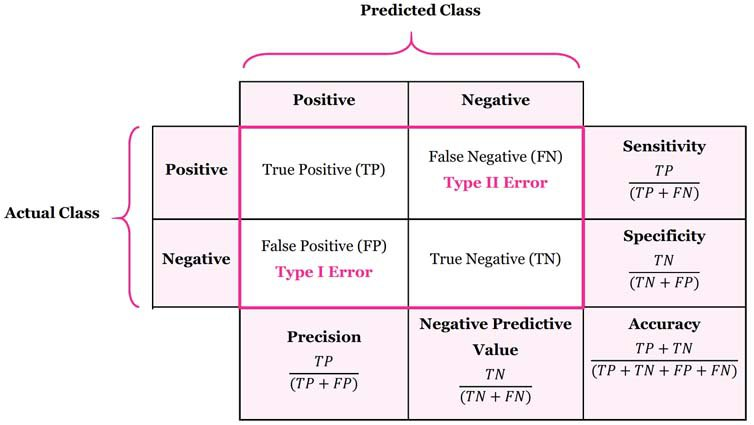

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)
#각각은 왼쪽 위부터 순서대로 TP,FN,FP,TN의 개수를 나타냅니다. 특히, 손글씨 문제에서의 `0`은 Positive 역할을, `3`은 Negative 역할을 합니다. 



array([[319,   3],
       [  3,  35]])

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       322
           3       0.92      0.92      0.92        38

    accuracy                           0.98       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.98      0.98      0.98       360



In [55]:
confusion_matrix(y_test, fake_pred)

array([[322,   0],
       [ 38,   0]])

In [57]:
print(classification_report(y_test, fake_pred))
# 3 에 대한 정확도가 0임을 알수 있다

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       322
           3       0.00      0.00      0.00        38

    accuracy                           0.89       360
   macro avg       0.45      0.50      0.47       360
weighted avg       0.80      0.89      0.84       360



In [59]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)
# 정확도에는 별 문제가 없다

(0.9833333333333333, 0.8944444444444445)

### 3-1 손글씨를 분류

In [96]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


digits = load_digits()
digits_data = digits.data
digits_label = digits.target

# 데이터 지정
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=40)

# targetname 출력
print(digits.target_names)

# 의사결정트리
decision_tree = DecisionTreeClassifier(random_state=40)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

# 랜덤포레스트
random_forest = RandomForestClassifier(random_state=40)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

# S V M

svm_model = svm.SVC()

print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

# SGD Classifier 확률적 경사하강법

sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Logistic Regression 로지스틱 회귀

logistic_model = LogisticRegression(max_iter=10000)


print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

[0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.77      0.72      0.75        47
           2       0.81      0.79      0.80        38
           3       0.74      0.68      0.71        34
           4       0.90      0.92      0.91        38
           5       0.83      0.86      0.84        28
           6       0.97      0.97      0.97        34
           7       0.81      0.86      0.83        35
           8       0.76      0.72      0.74        36
           9       0.73      0.80      0.76        40

    accuracy                           0.82       360
   macro avg       0.83      0.83      0.83       360
weighted avg       0.82      0.82      0.82       360

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.96      1.00      0.98        47
           2       1.00      0.97      0.99        38
  

### 서포트 벡터 머신이 가장 정확하게 나옴 
이유 : 숫자는 참인 것을 참이라고 판단할 때 의미가 있다고 생각하여 평가 지표로 Recall을 선택. 


### 3-2 와인 분류

In [105]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


wine = load_wine()
wine_data = wine.data
wine_label = wine.target

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=30)

# targetname 출력
print(wine.target_names)


# 의사결정트리
decision_tree = DecisionTreeClassifier(random_state=30)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

# 랜덤포레스트
random_forest = RandomForestClassifier(random_state=30)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

# S V M

svm_model = svm.SVC()

print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

# SGD Classifier 확률적 경사하강법

sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Logistic Regression 로지스틱 회귀

logistic_model = LogisticRegression(max_iter=5000)


print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

['class_0' 'class_1' 'class_2']
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.81      0.81      0.81        16
           2       0.88      0.78      0.82         9

    accuracy                           0.83        36
   macro avg       0.84      0.83      0.84        36
weighted avg       0.83      0.83      0.83        36

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

classifier
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.79      0.69      0.73        16
           2       0.46      0.6

## 랜덤포레스트 분류가 적당함
이유 : 어떠한 와인인지 알아내는것이 중요하기때문에 랜덤포레스트와 로지스틱회귀가 같은 값이 나왔으나 분류하되 3번 분류를 진행해야하기에 판단함

### 3-3 유방암 진단 분류

In [103]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=40)

# targetname 출력
print(breast_cancer.target_names)

# 의사결정트리
decision_tree = DecisionTreeClassifier(random_state=40)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

# 랜덤포레스트
random_forest = RandomForestClassifier(random_state=40)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

# S V M

svm_model = svm.SVC()

print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

# SGD Classifier 확률적 경사하강법

sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Logistic Regression 로지스틱 회귀

logistic_model = LogisticRegression(max_iter=5000)


print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

['malignant' 'benign']
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.99      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.99      0.95      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

classifier
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.94      0.96      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0

## 로지스틱 회귀가 적합함 
유방암의 경우 양성과 음성을 정확하게 판단하는것이 중요하다고 생각하여 accuracy 로 판단함